<a href="https://colab.research.google.com/github/manukrmanu/machine-learning/blob/main/nlp_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/twitter_validation.csv',header=None,encoding='ISO-8859-1') # encoding is used bec spl char or imogee ect can occur
df.columns=['id','social media','target','text']
df

,id,social media,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [ ]:
df.dtypes

id               int64
social media    object
target          object
text            object
dtype: object

In [ ]:
df.isna().sum()

id              0
social media    0
target          0
text            0
dtype: int64

In [ ]:
df['target'].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

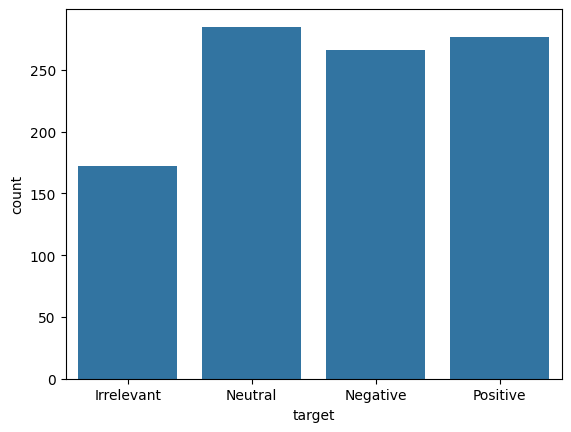

In [ ]:
sns.countplot(x='target',data=df)

In [ ]:
df['social media'].value_counts()

RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
TomClancysRainbowSix                 35
Nvidia                               35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
Facebook                             33
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Overwatch                            32
Hearthstone                          32
Verizon                              32
CS-GO                                32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                                27


<Axes: xlabel='social media', ylabel='count'>

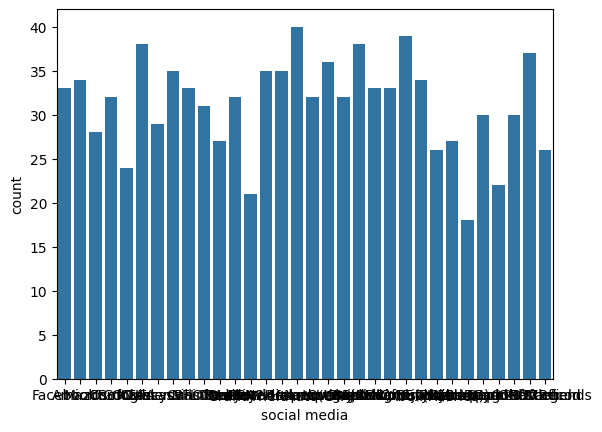

In [ ]:
sns.countplot(x='social media',data=df)

In [ ]:
df=df.iloc[:,2:4]

In [ ]:
df=df.loc[(df['target']!='Irrelevant')]
df
#df.drop(df.index[(df['target']=='Irrelevant')],axis=0,inplace=True)

,target,text
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
5,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
993,Negative,Please explain how this is possible! How can t...
994,Positive,Good on Sony. As much as I want to see the new...
997,Positive,Today sucked so itâs time to drink wine n pl...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.reset_index(drop=True,inplace=True)
df

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
#df['target']=df['target'].str.replace('Neutral','0')
#df['target']=df['target'].str.replace('Positive','1')
#df['target']=df['target'].str.replace('Negative','-1')
df['target']=df['target'].map({'Positive':1,'Negative':-1,'Neutral':0})

In [ ]:
df

,target,text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.dtypes

target     int64
text      object
dtype: object

In [ ]:
nltk.download('stopword')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('onw-1.4')

[nltk_data] Error loading stopword: Package 'stopword' not found in
[nltk_data]     index
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading onw-1.4: Package 'onw-1.4' not found in
[nltk_data]     index


False

In [ ]:
tweets=df.text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [ ]:
#tokenization
from nltk import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [ ]:
tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')
tweets

<ipython-input-140-243a49c37bfd>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')


0      BBC News Amazon boss Jeff Bezos rejects claims...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp I ve had Madeleine McCann in my cell...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so it s time to drink wine n play...
826     Bought a fraction of Microsoft today Small wins 
827    Johnson Johnson to stop selling talc baby powd...
Name: text, Length: 828, dtype: object

In [ ]:
#
from nltk.tokenize import word_tokenize
tweets=tweets.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
tweets

0      BBC News Amazon boss Jeff Bezos rejects claims...
1      Microsoft Why pay for WORD when functions poor...
2      CSGO matchmaking full closet hacking truly awf...
3      Now the President slapping Americans the face ...
4      EAHelp had Madeleine McCann cellar for the pas...
                             ...                        
823    Please explain how this possible How can they ...
824    Good Sony much want see the new PS5 what going...
825    Today sucked time drink wine play borderlands ...
826           Bought fraction Microsoft today Small wins
827    Johnson Johnson stop selling talc baby powder ...
Name: text, Length: 828, dtype: object

In [ ]:
#stemming
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay for word when function poor ...
2           csgo matchmak full closet hack truli aw game
3      now the presid slap american the face that rea...
4      eahelp had madelein mccann cellar for the past...
                             ...                        
823    pleas explain how this possibl how can they le...
824    good soni much want see the new ps5 what go ri...
825    today suck time drink wine play borderland unt...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder and...
Name: text, Length: 828, dtype: object

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
sw=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
tweets

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      eahelp madelein mccann cellar past year littl ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine play borderland sun...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder can...
Name: text, Length: 828, dtype: object

In [ ]:
# vectorisation
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(tweets)

In [ ]:
train_data.shape

(828, 3783)

In [ ]:
y=df['target'].values
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [ ]:
y.ndim

1

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=0.30,random_state=42)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
k_model=KNeighborsClassifier(n_neighbors=7)
n_model=MultinomialNB()
s_model=SVC()
lst=[k_model,n_model,s_model]


In [ ]:
for i in lst:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.42      0.72      0.53        79
           0       0.49      0.37      0.42        79
           1       0.53      0.31      0.39        91

    accuracy                           0.46       249
   macro avg       0.48      0.47      0.45       249
weighted avg       0.48      0.46      0.44       249

              precision    recall  f1-score   support

          -1       0.60      0.54      0.57        79
           0       0.47      0.54      0.50        79
           1       0.64      0.59      0.61        91

    accuracy                           0.56       249
   macro avg       0.57      0.56      0.56       249
weighted avg       0.57      0.56      0.56       249

              precision    recall  f1-score   support

          -1       0.67      0.52      0.59        79
           0       0.46      0.76      0.57        79
           1       0.76      0.48      0.59        91

    accuracy        